# 4주차 미션

## 미션에 도전하기 전에 먼저!!
<데이터 특이사항>
* 오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 
합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 
해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!

* [원본데이터] 국가통계포털 : [http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

In [1]:
# 공통 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

#     2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 데이터
#     합계, 계 데이터는 제외
#     판매유형별 데이터에도 면세점 데이터는 제외
#     온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [2]:
# 데이터 확인
print(df.shape)
df.head()

df.describe(include='object')
df['판매유형별'].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

### Q1. 시점컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요

In [3]:
# 데이터 확인하기
df.head(3)

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791


In [4]:
# 컬럼명을 데이터 -> 백만
df.rename(columns={'데이터': '백만'}, inplace=True)
df[['시점','백만']]

,시점,백만
0,2017.1/4,1054
1,2017.2/4,946
2,2017.3/4,791
3,2017.4/4,854
4,2018.1/4,2033
...,...,...
2767,2021.2/4,1278
2768,2021.3/4,1154
2769,2021.4/4,1076
2770,2022.1/4,2325


In [5]:
# 시점 컬럼에서 연도, 분기 컬럼 분리하여 타입 확인 후 수치형으로 변경하기
# 연도를 분리 : map(), lambda사용

df['연도'] = df['시점'].map(lambda x : int(x.split('.')[0]))
df['연도']

0       2017
1       2017
2       2017
3       2017
4       2018
        ... 
2767    2021
2768    2021
2769    2021
2770    2022
2771    2022
Name: 연도, Length: 2772, dtype: int64

In [6]:
# 분기
df['분기'] = df['시점'].map(lambda x : int((x.split('.')[1]).split('/')[0]))
df['분기']

0       1
1       2
2       3
3       4
4       1
       ..
2767    2
2768    3
2769    4
2770    1
2771    2
Name: 분기, Length: 2772, dtype: int64

In [7]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [8]:
# 소수점 첫째자리 까지 출력하기 위한 디스플레이 옵션 설정
pd.options.display.float_format = '{:.0f}'.format

In [9]:
# 따로 추출하여 기술통계값 구하기
df_describe=df[['백만','연도','분기']].describe()
df_describe

,백만,연도,분기
count,2772,2772,2772
mean,1613,2019,2
std,4273,2,1
min,-10003,2017,1
25%,42,2018,1
50%,292,2019,2
75%,1181,2021,3
max,47689,2022,4


### Q2. pivot_table을 사용하여 국가(대륙) 별 연도별 판매액의 합계를 분석해 주세요.

In [10]:
# Q1에서 나눈 연도 컬럼을 사용하여 pivot_table 사용
df_pivot = df.pivot_table(index='국가(대륙)별', values='백만', columns='연도',aggfunc='sum').copy()
df_pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<AxesSubplot: xlabel='연도', ylabel='국가(대륙)별'>

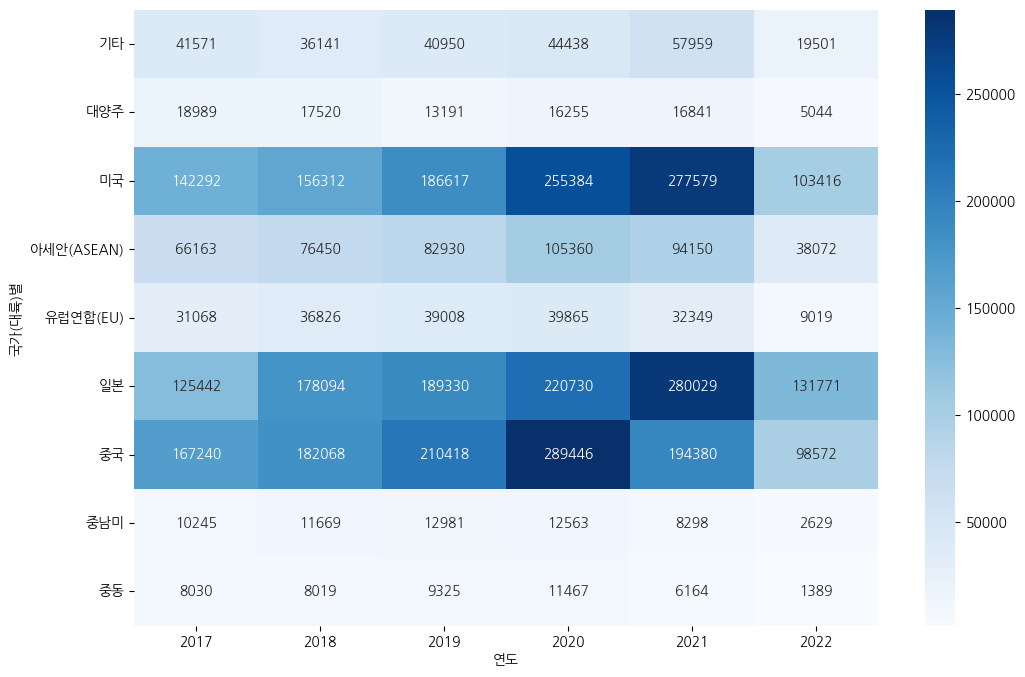

In [11]:
# 시각화
plt.figure(figsize=(12,8))
sns.heatmap(data=df_pivot, cmap='Blues', annot=True, fmt='.0f')

### Q3 groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.
* `2020년`은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 
이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 
또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [12]:
# 기존 데이터에서 연도가 2020년인 데이터만 추출
df_2020= df[df['연도']==2020]
df_2020.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1


In [13]:
df_sales = df_2020.groupby(["국가(대륙)별", "상품군별"]).sum().unstack()
df_sales


/var/folders/nr/0pg07f8n56n3jfksqk_3y0500000gn/T/ipykernel_4959/2986119398.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales = df_2020.groupby(["국가(대륙)별", "상품군별"]).sum().unstack()


백만                                                       \
상품군별       가전·전자·통신기기    기 타 농축수산물 사무·문구 생활용품 및 자동차용품   서 적 소프트웨어 스포츠·레저용품   
국가(대륙)별                                                                      
기타               1716   3345     9   187         1464  4563    21      755   
대양주              3825    923     1    21         1198   367    20      690   
미국              10103  38731    33   398        11467  9709   865     5862   
아세안(ASEAN)      12405   2620    17  3279         6432  4192     3     7423   
유럽연합(EU)         3040   3907     0    25         2560   514    99     1297   
일본                404  30509     2  1526         3911  1055    27      646   
중국               1353  22736    88   403         7142  6659     4     3999   
중남미               912    625     0     3         1361   188    15      183   
중동                839    533     0     4         1060   139    17      196   

                          ...           분기                                   \
상품군별       아동·유아용품 음·식료품  ... 생활용품 및 자동차용품 서 적 소프트웨어 스포츠·레저용품 아동·유아용품 음·식료품   
국가(대륙)별                   ...                                                 
기타            1646  1596  ...           10  10    10       10      10    10   
대양주            484   403  ...           10  10    10       10      10    10   
미국            4934  2706  ...           10  10    10       10      10    10   
아세안(ASEAN)    2698  4291  ...           10  10    10       10      10    10   
유럽연합(EU)      1354   423  ...           10  10    10       10      10    10   
일본            1353  4699  ...           10  10    10       10      10    10   
중국            5606  4220  ...           10  10    10       10      10    10   
중남미            151   774  ...           10  10    10       10      10    10   
중동             121   927  ...           10  10    10       10      10    10   

                                                  
상품군별       음반·비디오·악기 의류 및 패션 관련상품 컴퓨터 및 주변기기 화장품  
국가(대륙)별                                           
기타                10           10         10  10  
대양주               10           10         10  10  
미국                10           10         10  10  
아세안(ASEAN)        10           10         10  10  
유럽연합(EU)          10           10         10  10  
일본                10           10         10  10  
중국                10           10         10  10  
중남미               10           10         10  10  
중동                10           10         10  10  

[9 rows x 42 columns]

<AxesSubplot: xlabel='None-상품군별', ylabel='국가(대륙)별'>

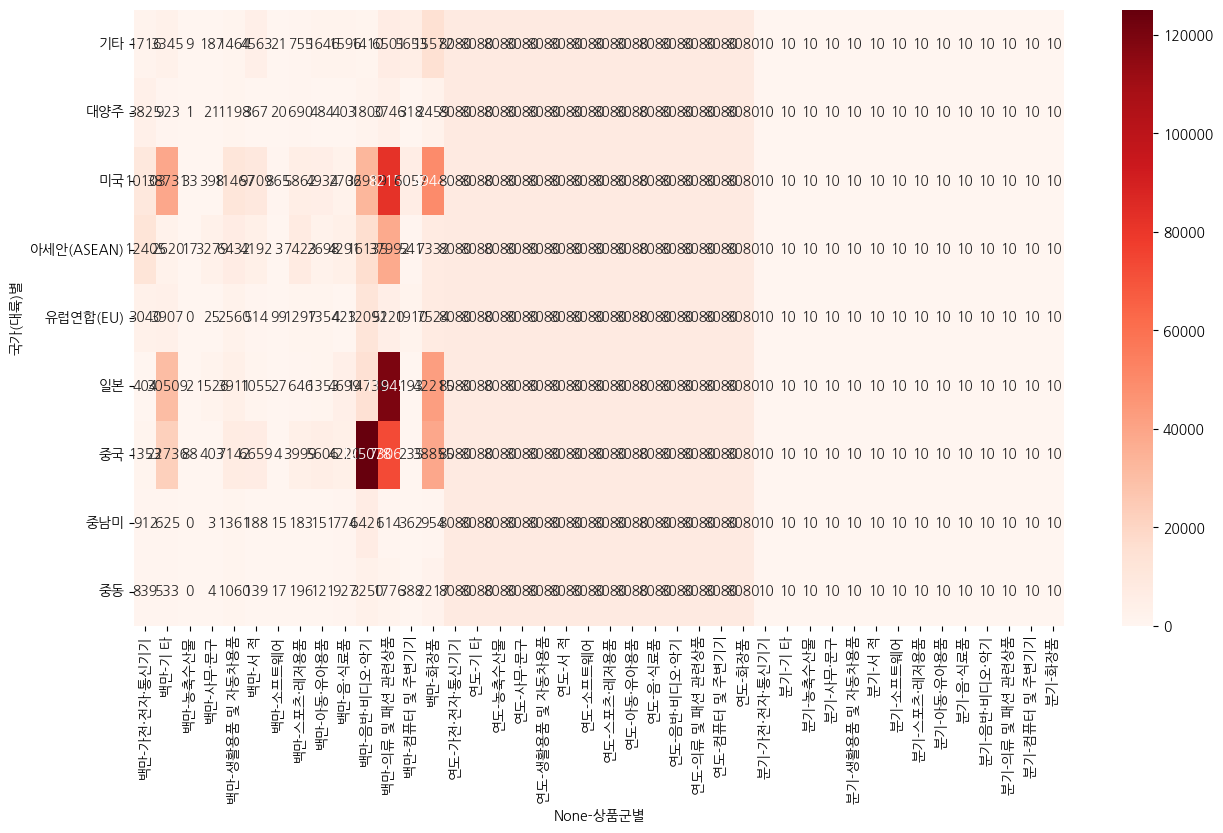

In [14]:
# heatmap을 사용하여 시각화 하기
plt.figure(figsize=(15,8))
plt.xticks(rotation=30)
sns.heatmap(data=df_sales, cmap='Reds',annot=True, fmt=".0f")

### Q4. 주요 판매국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요
- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 
2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [15]:
df['연도'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [16]:
## 22년 제외
df_2021 = df[df['연도']!=2022]
df_2021['연도'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [17]:
# 해당 지역만 추출
df_sales = df_2021[(df_2021['국가(대륙)별'] == "미국") | (df_2021['국가(대륙)별'] == "중국") | (df_2021['국가(대륙)별'] == "일본")]
df_sales["국가(대륙)별"].unique()

array(['미국', '중국', '일본'], dtype=object)

In [18]:
# 해당 상품(상품군별)만 추출하기
df_total = df_sales[(df_sales['상품군별'] ==  "의류 및 패션 관련상품") | (df_sales['상품군별'] ==  "화장품") | (df_sales['상품군별'] ==   "음반·비디오·악기")]
df_total['상품군별'].unique()

array(['음반·비디오·악기', '의류 및 패션 관련상품', '화장품'], dtype=object)

/var/folders/nr/0pg07f8n56n3jfksqk_3y0500000gn/T/ipykernel_4959/2439801711.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_total, x="연도", y="백만", hue="상품군별", ci=None )
/Users/limseongbeom/opt/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/limseongbeom/opt/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/limseongbeom/opt/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


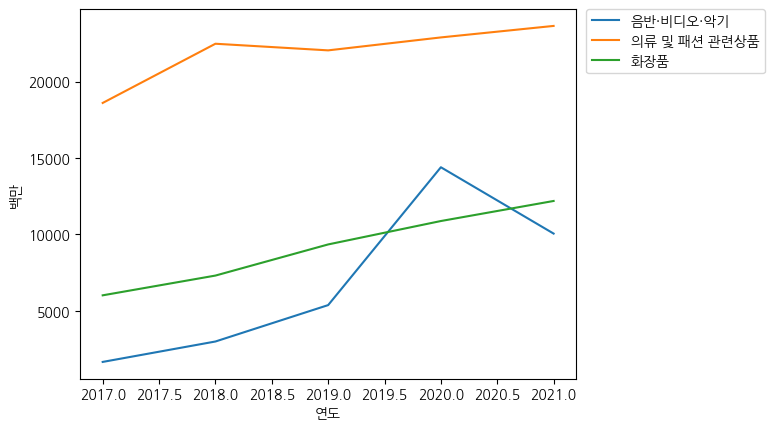

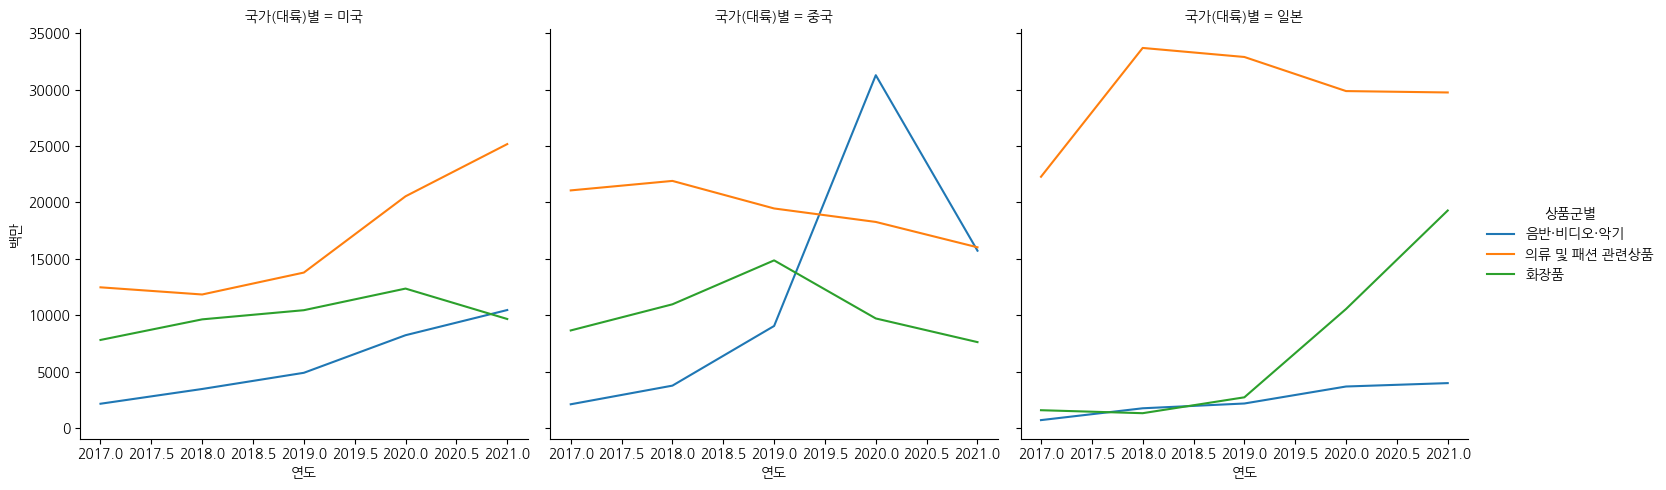

In [19]:
# lineplot으로 연도별, 상품군별 판매액 시각화 하기
sns.lineplot(data=df_total, x="연도", y="백만", hue="상품군별", ci=None )
# 범례를 차트 바깠으로 빼기
# 신뢰구간은 제외
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# 국가별로 자세히 볼  수 있는 시각화 하기위해 서브플롯 사용하기
sns.relplot(data=df_total, x="연도", y="백만", hue="상품군별", 
            dashes=False, markers=True, kind="line", col="국가(대륙)별", col_wrap=3, ci=None)